In [1]:
import random 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris 
%matplotlib inline


/home/ma-user/anaconda3/envs/PyTorch-1.8/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


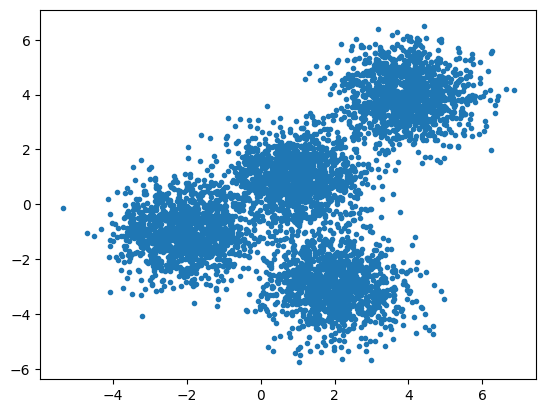

In [2]:
#使用 numpy 的 random.seed()函数，其中种子将被设置为 0
np.random.seed(0)
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)
#显示随机生成的数据的散点图
plt.scatter(X[:, 0], X[:, 1], marker='.')

In [3]:
#设置初始化方法为 k-means++，生成簇数为 4，质心种子次数为 12
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [4]:
#拟合模型
k_means.fit(X)


k_means_labels = k_means.labels_
#打印标签进行查看
k_means_labels

array([0, 2, 2, ..., 3, 0, 0], dtype=int32)

In [5]:
k_means_cluster_centers = k_means.cluster_centers_
#打印坐标进行查看
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822],
       [ 3.97334234,  3.98758687]])

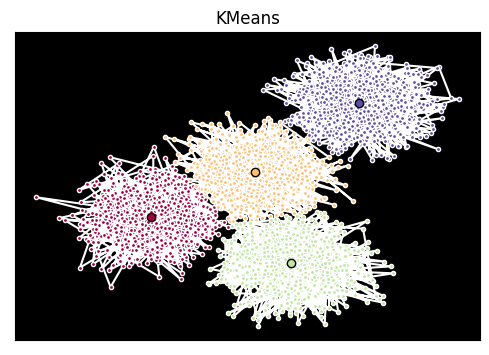

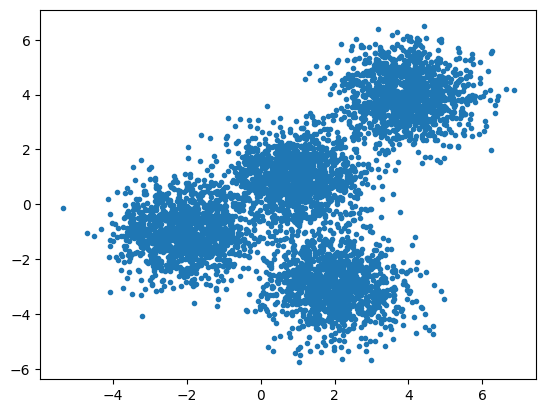

In [6]:
# 指定图形尺寸
fig = plt.figure(figsize=(6, 4))
#颜色使用一个颜色映射，它将根据标签的数量生成一个颜色数组。 我们使用 set（k_means_labels）来获取唯一的标签。
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))
#创建一个黑色背景（背景为黑色，这样有助于我们看到各类中的样本点与聚类中心的连接）
ax = fig.add_subplot(1, 1, 1, facecolor = 'black')
# 用于绘制数据点和聚类中心的循环。
#k 将在 0-3 范围内，这将匹配每个数据点所在的可能簇。
for k, col in zip(range(len([[2, 2], [-2, -1], [4, -3], [1, 1]])), colors):
 # 创建所有数据点的列表，其中类中的数据点标记为 true，否则标记为 false。
 my_members = (k_means_labels == k)
 # 定义聚类中心
 cluster_center = k_means_cluster_centers[k] 
 # 使用 color col 绘制数据点.
 ax.plot(X[my_members, 0], X[my_members, 1], 'w',
 markerfacecolor=col, marker='.')
 # 指定颜色绘制聚类中心
 ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
 markeredgecolor='k', markersize=6)
# 图名称
ax.set_title('KMeans')
# 删除 x 轴刻度
ax.set_xticks(())
# 删除 y 轴刻度
ax.set_yticks(())
# 展示图
plt.show()
# 显示上面的散点图进行比较。
plt.scatter(X[:, 0], X[:, 1], marker='.')

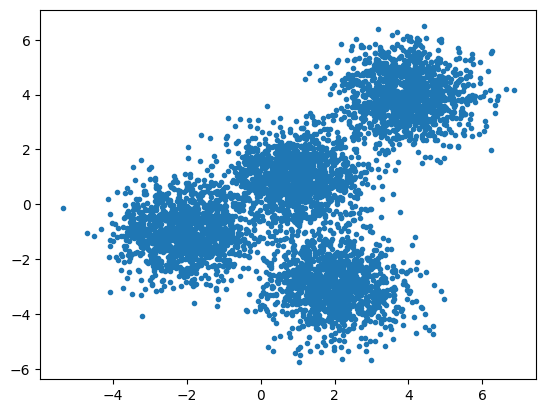

In [7]:
#k 将在 0-3 范围内，这将匹配每个数据点所在的可能簇。
for k, col in zip(range(len([[2, 2], [-2, -1], [4, -3], [1, 1]])), colors):
 # 创建所有数据点的列表，其中类中的数据点标记为 true，否则标记为 false。
 my_members = (k_means_labels == k)
 # 定义聚类中心
 cluster_center = k_means_cluster_centers[k] 
 # 使用 color col 绘制数据点.
 ax.plot(X[my_members, 0], X[my_members, 1], 'w',
 markerfacecolor=col, marker='.')
 # 指定颜色绘制聚类中心
 ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
 markeredgecolor='k', markersize=6)
# 图名称
ax.set_title('KMeans')
# 删除 x 轴刻度
ax.set_xticks(())
# 删除 y 轴刻度
ax.set_yticks(())
# 展示图
plt.show()
# 显示上面的散点图进行比较。
plt.scatter(X[:, 0], X[:, 1], marker='.')


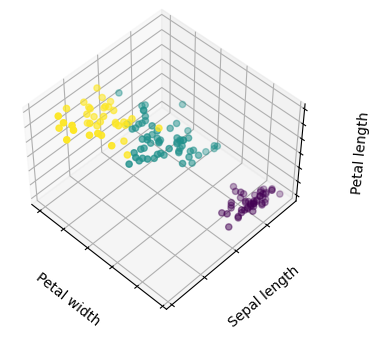

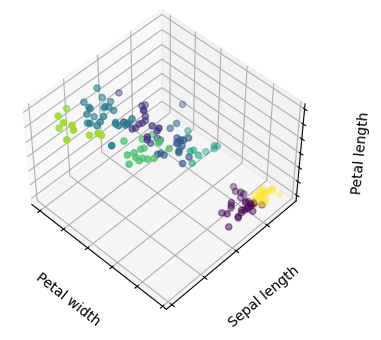

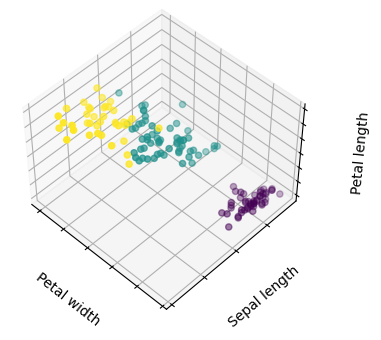

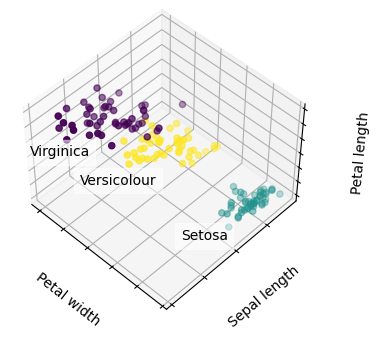

In [8]:
#对 iris 数据集进行聚类分析
#使用 load_iris() 函数, 将 iris 数据集储存在变量 iris 中
iris = load_iris()

#同时将 iris.data 赋值给 X 变量，将 iris.target 赋值给 y 变量
X = iris.data
y = iris.target

estimators = {'k_means_iris_3': KMeans(n_clusters=3),
 'k_means_iris_8': KMeans(n_clusters=8),
 'k_means_iris_bad_init': KMeans(n_clusters=3, n_init=1,
 init='random')}
fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, auto_add_to_figure=False, rect=[0, 0, .95, 1], elev=48, azim=134)
    fig.add_axes(ax)
    plt.cla()
    est.fit(X)
    labels = est.labels_
    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    fignum = fignum + 1
# 绘制结果
fig = plt.figure(fignum, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, auto_add_to_figure=False, rect=[0, 0, .95, 1], elev=48, azim=134)
fig.add_axes(ax)
plt.cla()
for name, label in [('Setosa', 0),
 ('Versicolour', 1),
 ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
    X[y == label, 0].mean() + 1.5,X[y == label, 2].mean(), name,
    horizontalalignment='center',
    bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    
#重新排序标签以使颜色与聚类结果匹配
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()


In [9]:
# 读取数据
sale= pd.read_csv("sale_customers.csv", delimiter=",")
print(sale)
from sklearn.cluster import KMeans
model = KMeans(init = "k-means++", n_clusters = 4, n_init = 12) 
model.fit(sale) #开始聚类
model_cluster_centers = model.cluster_centers_
print(model_cluster_centers)#聚类中心
model_labels = model.labels_
print(model_labels)#类标签



     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0    12669   9656     7561     214              2674        1338
1     7057   9810     9568    1762              3293        1776
2     6353   8808     7684    2405              3516        7844
3    13265   1196     4221    6404               507        1788
4    22615   5410     7198    3915              1777        5185
..     ...    ...      ...     ...               ...         ...
435  29703  12051    16027   13135               182        2204
436  39228   1431      764    4510                93        2346
437  14531  15488    30243     437             14841        1867
438  10290   1981     2232    1038               168        2125
439   2787   1698     2510      65               477          52

[440 rows x 6 columns]
[[19888.27272727 36142.36363636 45517.45454545  6328.90909091
  21417.09090909  8414.        ]
 [ 4808.84210526 10525.01052632 16909.78947368  1462.58947368
   7302.4         1650.88421053]
 [3614